In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from descartes import PolygonPatch
from tqdm import tqdm

In [24]:
df = pd.read_csv("data/full_run_1.zip",skiprows=6)
print(df.shape)

(10496, 42)


In [3]:
#remove all the columns that have the same value in all rows.
for c in df.columns:
    if len(df[c].unique()) < 2:
        df = df.drop(columns=c)

In [25]:
#remove all rows with no data, these are usually the rows at the start of a run.
l = []
for r in df.index:
    if len(df.iloc[r,5:].unique())<2:
        l.append(r)

df = df.drop(index=l)

In [5]:
#shape of the imported file vs reduced files shows only step[0] of each run has no results. Great news!

In [26]:
#I found this code to make dict from long list.
def listToDict(lst):
    op = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return op

In [27]:
steps = []
n_steps = 20000 
for index, row in tqdm(df.iloc[:n_steps,:].iterrows(), total=n_steps):
    l = []
    for column in df.columns[:5]:
        x = row[column]
        new_df = pd.DataFrame(index=np.arange(0,114), columns=[column])
        new_df[column] = x
        l.append(new_df)
    for column in df.columns[5:]:
        x = row[column].replace("[","").replace("]","").split(" ")
        d = listToDict(x)
        new_df = pd.DataFrame(index=np.arange(0, len(d)), columns=['Neighborhood number', column])
        new_df['Neighborhood number'] = [*d]
        new_df[column] = list(d.values())
        l.append(new_df)
        # empty_df.loc[index, column] = x
    steps.append(pd.concat(l, axis=1))

  0%|                                                                                        | 0/20000 [00:00<?, ?it/s]


IndexError: list index out of range

In [8]:
full_df = pd.concat(steps).loc[:,~pd.concat(steps).columns.duplicated()]

In [9]:
full_df = full_df.astype({'[run number]': int, 'size-of-std' : float, 'random-attributes?' : bool,
       'housing-market-inflation?' : bool, '[step]' : int, 'Neighborhood number' : int,
       'KPI-available_buy_houses' : float, 'KPI-available_part_rent_houses' : float,
       'KPI-available_social_rent_houses' : float, 'KPI-avg_income' : float, 'KPI-avg_price' : float,
       'KPI-avg_utility' : float, 'KPI-citizen-count' : float, 'KPI-p-sc-lower' : float,
       'KPI-p-sc-working' : float, 'KPI-p-sc-middle' : float, 'KPI-p-sc-upper' : float, 'KPI-p-dutch' : float,
       'KPI-p-other-western' : float, 'KPI-p-antilles' : float, 'KPI-p-morocco' : float,
       'KPI-p-suriname' : float, 'KPI-p-turkey' : float, 'KPI-p-indonesian' : float,
       'KPI-p-eastern-eu' : float, 'KPI-p-other-nonwestern' : float})

In [10]:
full_df.describe().round(2)

[run number]  size-of-std      [step]  Neighborhood number  \
count    1167360.00   1167360.00  1167360.00           1167360.00   
mean         128.50         0.31       20.50                61.99   
std           73.90         0.19       11.54                35.56   
min            1.00         0.12        1.00                 1.00   
25%           64.75         0.12       10.75                32.00   
50%          128.50         0.31       20.50                64.50   
75%          192.25         0.50       30.25                93.00   
max          256.00         0.50       40.00               121.00   

       KPI-available_buy_houses  KPI-available_part_rent_houses  \
count                1167360.00                      1167360.00   
mean                    2746.68                         1413.61   
std                     4859.55                         3349.32   
min                       -1.00                           -1.00   
25%                        1.00                            0.00   
50%                      798.00                           64.00   
75%                     3160.00                         1092.00   
max                    28180.00                        24769.00   

       KPI-available_social_rent_houses  KPI-avg_income  KPI-avg_price  \
count                        1167360.00      1167360.00     1167360.00   
mean                            1160.92        53873.19      486158.09   
std                             2216.72        33945.16      314792.51   
min                                0.00            0.00           0.00   
25%                                0.00        31135.00      274937.00   
50%                              105.00        45614.00      409941.00   
75%                             1453.00        67983.00      620279.00   
max                            14804.00       324779.00     2993606.41   

       KPI-avg_utility  ...  KPI-p-sc-upper  KPI-p-dutch  KPI-p-other-western  \
count       1167360.00  ...      1167360.00   1167360.00           1167360.00   
mean              0.19  ...            0.27         0.46                 0.11   
std               0.89  ...            0.31         0.25                 0.10   
min             -10.41  ...            0.00         0.00                 0.00   
25%               0.10  ...            0.00         0.25                 0.04   
50%               0.23  ...            0.12         0.54                 0.10   
75%               0.46  ...            0.52         0.62                 0.16   
max               5.06  ...            1.00         1.00                 1.00   

       KPI-p-antilles  KPI-p-morocco  KPI-p-suriname  KPI-p-turkey  \
count      1167360.00     1167360.00      1167360.00    1167360.00   
mean             0.03           0.04            0.03          0.06   
std              0.08           0.08            0.02          0.07   
min              0.00           0.00            0.00          0.00   
25%              0.01           0.00            0.02          0.02   
50%              0.01           0.02            0.04          0.05   
75%              0.03           0.04            0.05          0.10   
max              1.00           1.00            1.00          1.00   

       KPI-p-indonesian  KPI-p-eastern-eu  KPI-p-other-nonwestern  
count        1167360.00        1167360.00              1167360.00  
mean               0.05              0.06                    0.12  
std                0.08              0.09                    0.16  
min                0.00              0.00                    0.00  
25%                0.00              0.02                    0.07  
50%                0.02              0.03                    0.09  
75%                0.05              0.06                    0.12  
max                1.00              1.00                    1.00  

[8 rows x 24 columns]

In [11]:
#full_df.to_csv("output/df1.csv")

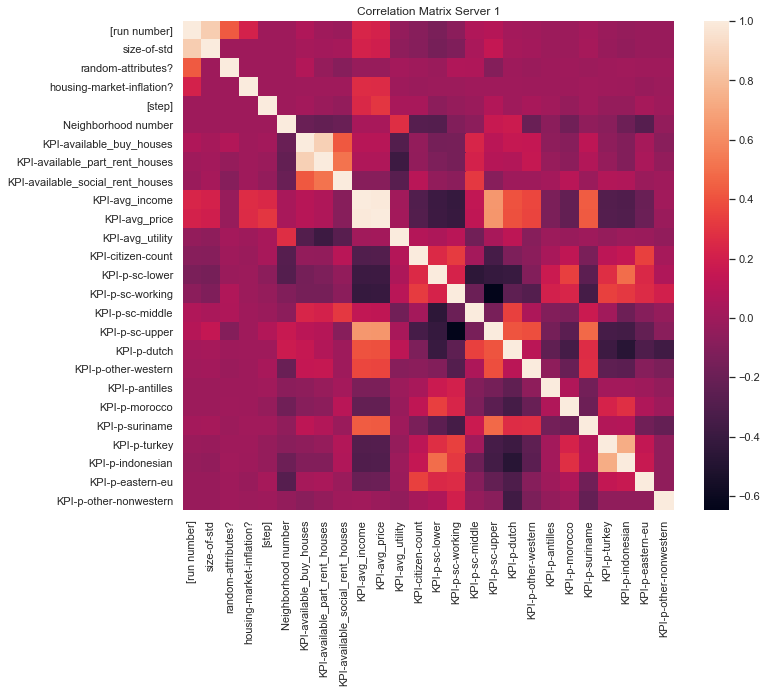

In [149]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(full_df.corr())
plt.title("Correlation Matrix Server 1")
#plt.savefig('output/images/corr_1.png')

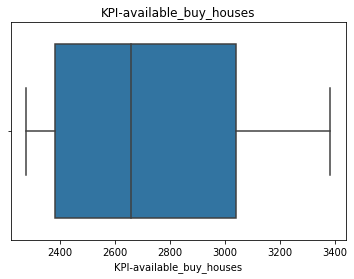

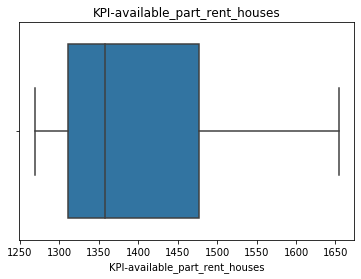

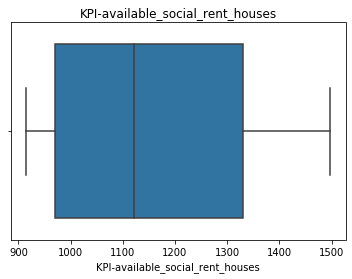

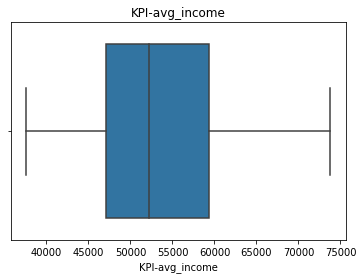

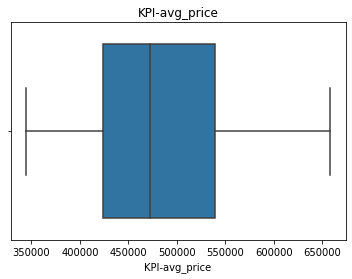

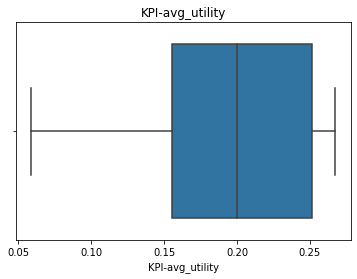

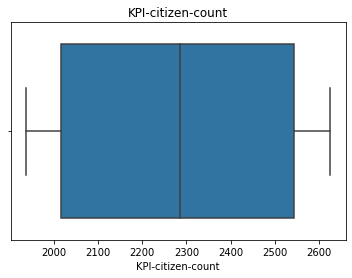

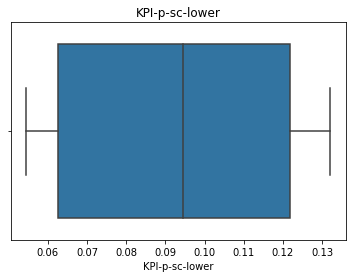

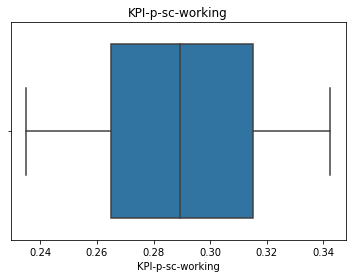

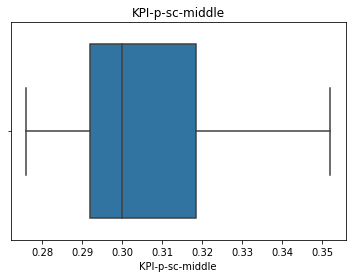

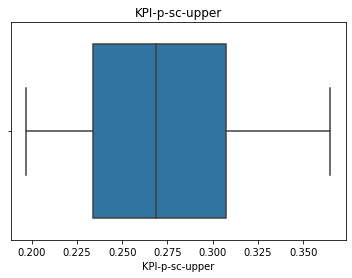

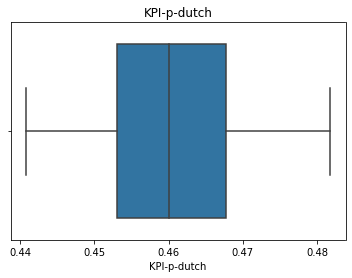

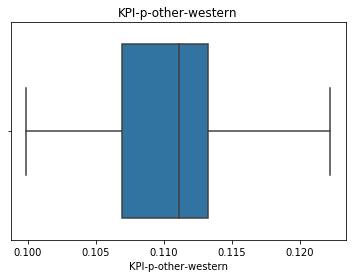

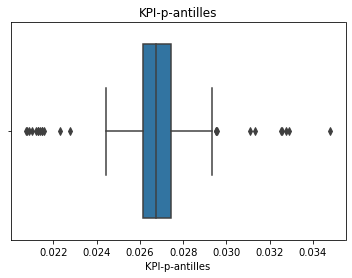

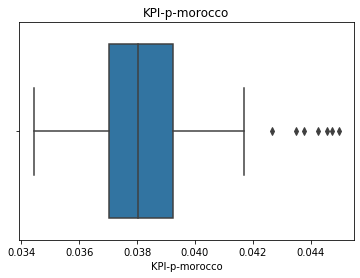

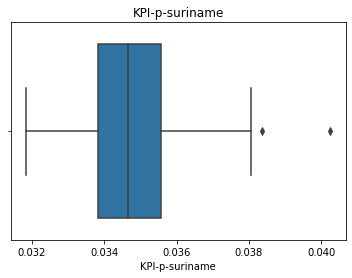

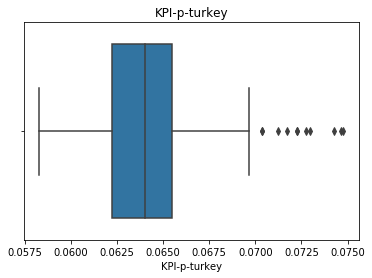

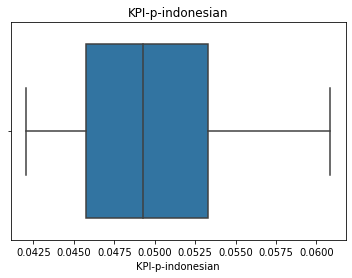

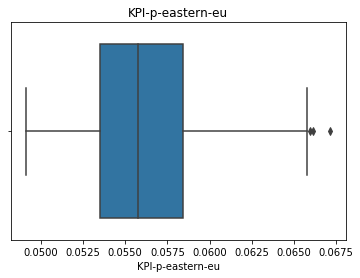

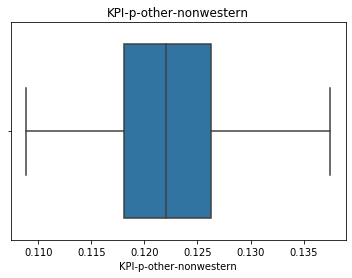

In [12]:
#The boxplots below give an indication of the spread of results from 256 runs.
for c in full_df.groupby("[run number]").mean().iloc[:,5:]:
    plt.figure()
    sns.boxplot(full_df.groupby("[run number]").mean().iloc[:,5:][c])
    plt.title(c)
    plt.show()

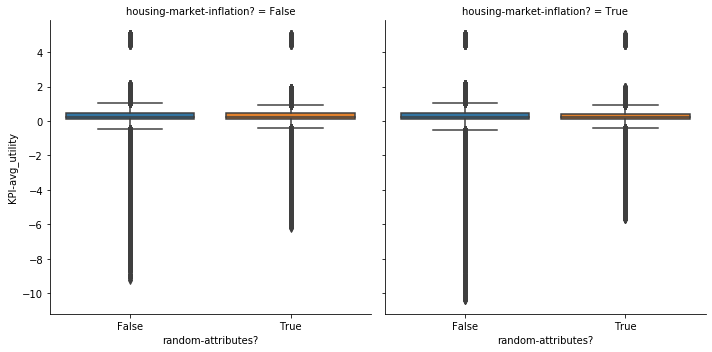

In [13]:
sns.catplot(x="random-attributes?", y="KPI-avg_utility",col="housing-market-inflation?",kind="box",data=full_df)

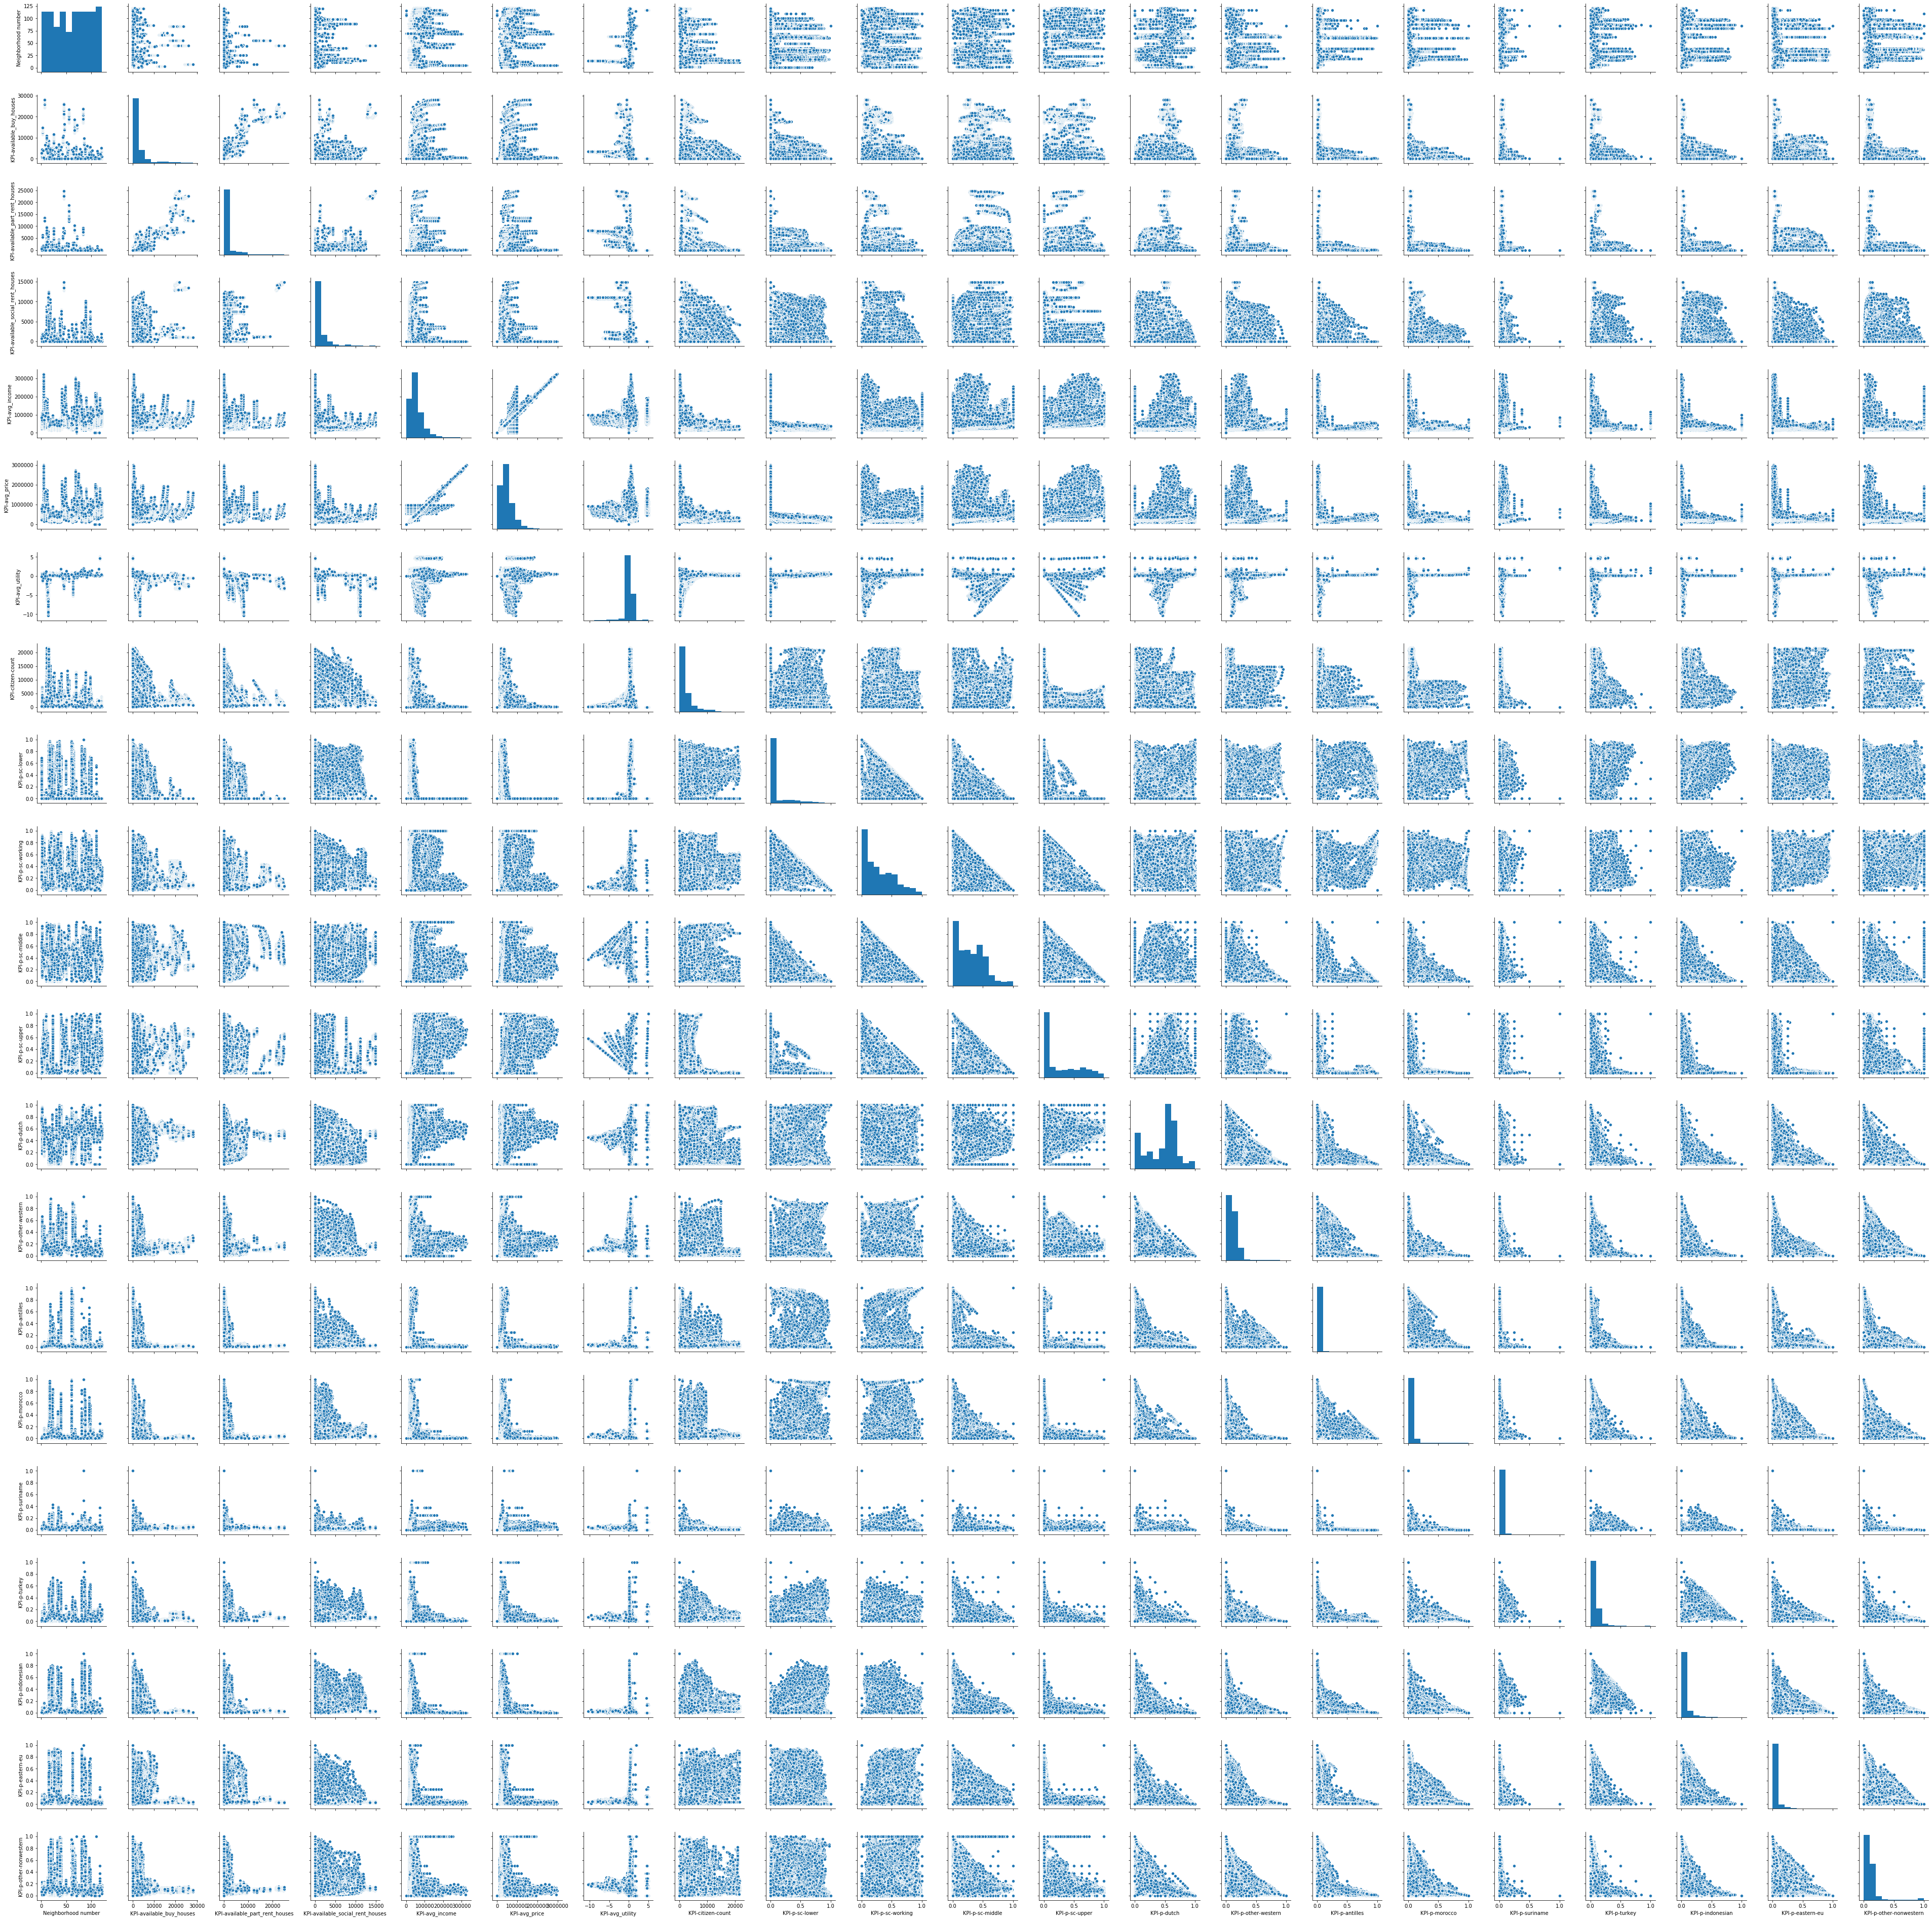

In [115]:
sns.pairplot(full_df[full_df.columns[5:]])

In [14]:
#this is for the report~
print(full_df.describe().round(2).T.drop(columns="count").to_latex(longtable=True))

\begin{longtable}{lrrrrrrr}
\toprule
{} &       mean &        std &    min &        25\% &        50\% &        75\% &         max \\
\midrule
\endhead
\midrule
\multicolumn{8}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
[run number]                     &     128.50 &      73.90 &   1.00 &      64.75 &     128.50 &     192.25 &      256.00 \\
size-of-std                      &       0.31 &       0.19 &   0.12 &       0.12 &       0.31 &       0.50 &        0.50 \\
[step]                           &      20.50 &      11.54 &   1.00 &      10.75 &      20.50 &      30.25 &       40.00 \\
Neighborhood number              &      61.99 &      35.56 &   1.00 &      32.00 &      64.50 &      93.00 &      121.00 \\
KPI-available\_buy\_houses         &    2746.68 &    4859.55 &  -1.00 &       1.00 &     798.00 &    3160.00 &    28180.00 \\
KPI-available\_part\_rent\_houses   &    1413.61 &    3349.32 &  -1.00 &       0.00 &      64.00 &    1092.00 &    24769.00 \

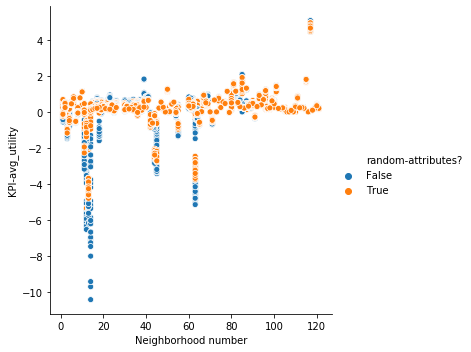

In [46]:
sns.relplot(x="Neighborhood number", y="KPI-avg_utility",hue="random-attributes?",data=final_step_df)

In [16]:
first_step_df = full_df[full_df["[step]"]==1]
final_step_df = full_df[full_df["[step]"]==40]

<Figure size 432x288 with 0 Axes>

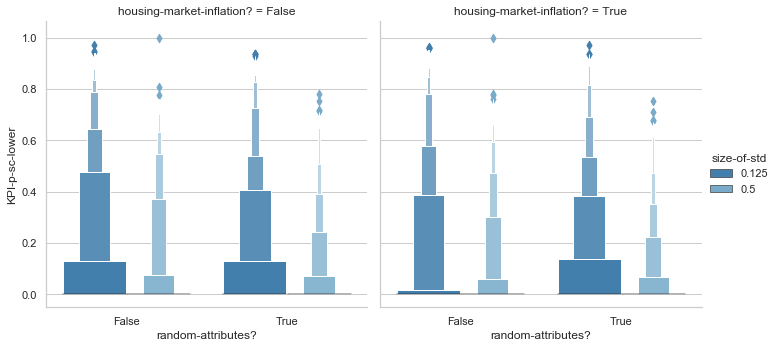

<Figure size 432x288 with 0 Axes>

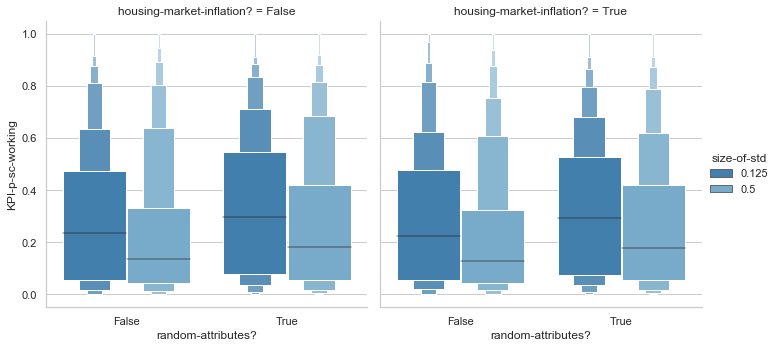

<Figure size 432x288 with 0 Axes>

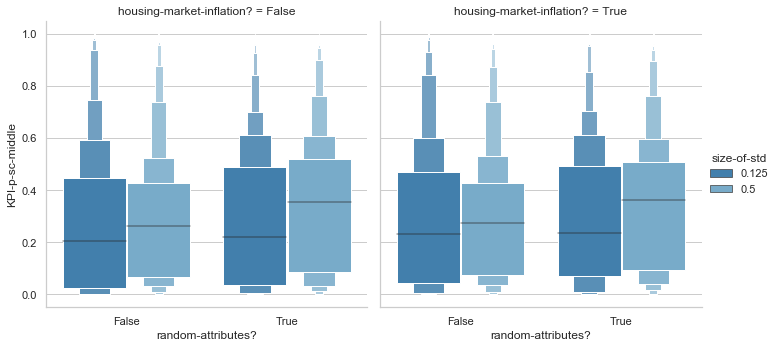

<Figure size 432x288 with 0 Axes>

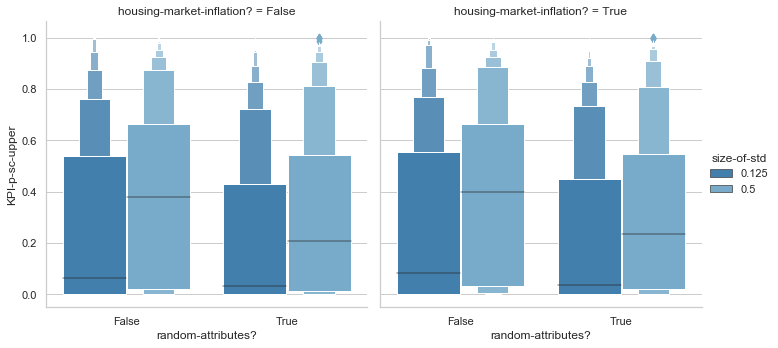

In [150]:
for c in final_step_df.columns[13:17]:
    plt.figure()
    sns.catplot(x="random-attributes?",y=c,hue="size-of-std",col="housing-market-inflation?",data=final_step_df,kind="boxen",palette="tab20c")
    plt.show()

In [68]:
transition_df = final_step_df.replace(False,0).replace(True,1).sort_values(["[run number]","Neighborhood number"]).reset_index() - first_step_df.replace(False,0).replace(True,1).sort_values(["[run number]","Neighborhood number"]).reset_index() 

In [69]:
transition_df["Neighborhood number"] = final_step_df.replace(False,0).replace(True,1).sort_values(["[run number]","Neighborhood number"]).reset_index()["Neighborhood number"]
transition_df["size-of-std"] = final_step_df.replace(False,0).replace(True,1).sort_values(["[run number]","Neighborhood number"]).reset_index()["size-of-std"]
transition_df["[run number]"] = final_step_df.replace(False,0).replace(True,1).sort_values(["[run number]","Neighborhood number"]).reset_index()["[run number]"]
transition_df["random-attributes?"] = final_step_df.sort_values(["[run number]","Neighborhood number"]).reset_index()["random-attributes?"]
transition_df["housing-market-inflation?"] = final_step_df.sort_values(["[run number]","Neighborhood number"]).reset_index()["housing-market-inflation?"]
transition_df = transition_df.drop(columns="index")

In [71]:
#This df shows the difference (or change) of statistics between the beginning and end of the run.
transition_df

[run number]  size-of-std  random-attributes?  \
0                 1        0.125               False   
1                 1        0.125               False   
2                 1        0.125               False   
3                 1        0.125               False   
4                 1        0.125               False   
...             ...          ...                 ...   
29179           256        0.500                True   
29180           256        0.500                True   
29181           256        0.500                True   
29182           256        0.500                True   
29183           256        0.500                True   

       housing-market-inflation?  [step]  Neighborhood number  \
0                          False      39                    1   
1                          False      39                    2   
2                          False      39                    3   
3                          False      39                    4   
4                          False      39                    5   
...                          ...     ...                  ...   
29179                       True      39                  117   
29180                       True      39                  118   
29181                       True      39                  119   
29182                       True      39                  120   
29183                       True      39                  121   

       KPI-available_buy_houses  KPI-available_part_rent_houses  \
0                         420.0                           236.0   
1                       -1356.0                          -940.0   
2                        1460.0                           892.0   
3                         449.0                           337.0   
4                          -2.0                            10.0   
...                         ...                             ...   
29179                      -1.0                             0.0   
29180                    1182.0                             0.0   
29181                     881.0                             0.0   
29182                    1663.0                           -20.0   
29183                     555.0                             0.0   

       KPI-available_social_rent_houses  KPI-avg_income  ...  KPI-p-sc-upper  \
0                                 528.0          1993.0  ...           0.003   
1                                -965.0           389.0  ...          -0.021   
2                                 327.0          1713.0  ...           0.095   
3                                 524.0          2085.0  ...           0.048   
4                                 -25.0          2024.0  ...           0.067   
...                                 ...             ...  ...             ...   
29179                               0.0         87442.0  ...          -0.053   
29180                               9.0         61063.0  ...           0.098   
29181                               0.0         59466.0  ...           0.122   
29182                              -9.0         60058.0  ...           0.192   
29183                               0.0         61214.0  ...           0.140   

       KPI-p-dutch  KPI-p-other-western  KPI-p-antilles  KPI-p-morocco  \
0            0.008               -0.009           0.004         -0.003   
1            0.292               -0.067          -0.015         -0.001   
2           -0.001                0.000          -0.005          0.001   
3           -0.021               -0.005           0.007          0.002   
4            0.003                0.003          -0.021          0.003   
...            ...                  ...             ...            ...   
29179       -0.607                0.250           0.000          0.125   
29180       -0.015               -0.024          -0.001          0.022   
29181        0.019               -0.005          -0.005         -0.003   
29182       -0.035                0.006        

In [155]:
melted_end_df = pd.melt(final_step_df.groupby("Neighborhood number").mean()[transition_df.columns[13:]].reset_index(), id_vars="Neighborhood number", var_name="KPI", value_name="percentage")

In [99]:
melted_df = pd.melt(transition_df.groupby("Neighborhood number").mean()[transition_df.columns[13:]].reset_index(), id_vars="Neighborhood number", var_name="KPI", value_name="percentage")

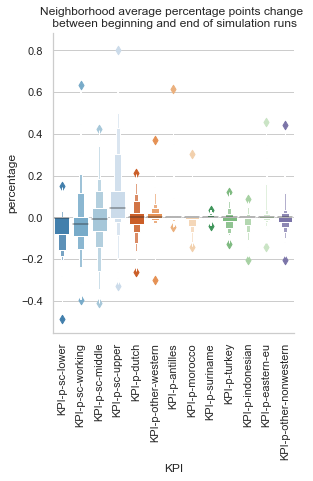

In [153]:
sns.set(style="whitegrid")
sns.catplot(x="KPI",y="percentage",data=melted_df,kind="boxen",palette="tab20c")
plt.title("Neighborhood average percentage points change \n between beginning and end of simulation runs")
plt.xticks(rotation=90)
plt.show()

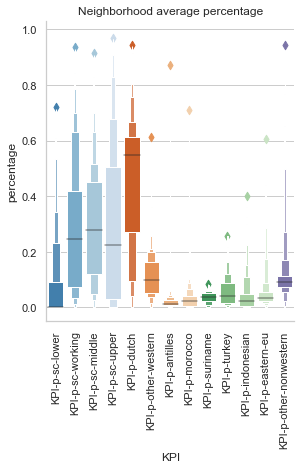

In [156]:
sns.set(style="whitegrid")
sns.catplot(x="KPI",y="percentage",data=melted_end_df,kind="boxen",palette="tab20c")
plt.title("Neighborhood average percentage")
plt.xticks(rotation=90)
plt.show()

In [187]:
final_step_df.columns

Index(['[run number]', 'size-of-std', 'random-attributes?',
       'housing-market-inflation?', '[step]', 'Neighborhood number',
       'KPI-available_buy_houses', 'KPI-available_part_rent_houses',
       'KPI-available_social_rent_houses', 'KPI-avg_income', 'KPI-avg_price',
       'KPI-avg_utility', 'KPI-citizen-count', 'KPI-p-sc-lower',
       'KPI-p-sc-working', 'KPI-p-sc-middle', 'KPI-p-sc-upper', 'KPI-p-dutch',
       'KPI-p-other-western', 'KPI-p-antilles', 'KPI-p-morocco',
       'KPI-p-suriname', 'KPI-p-turkey', 'KPI-p-indonesian',
       'KPI-p-eastern-eu', 'KPI-p-other-nonwestern'],
      dtype='object')

In [191]:
df_p1_on = final_step_df[final_step_df["size-of-std"]==0.5]
df_p1_off = final_step_df[final_step_df["size-of-std"]==0.125]
df_p2_on = final_step_df[final_step_df["random-attributes?"]==True]
df_p2_off = final_step_df[final_step_df["random-attributes?"]==False]
df_p3_on = final_step_df[final_step_df["housing-market-inflation?"]==True]
df_p3_off = final_step_df[final_step_df["housing-market-inflation?"]==False]

In [197]:
p1_on_mean = df_p1_on[df_p1_on.columns[5:]].groupby("Neighborhood number").mean()
p1_off_mean = df_p1_off[df_p1_off.columns[5:]].groupby("Neighborhood number").mean()
p2_on_mean = df_p2_on[df_p2_on.columns[5:]].groupby("Neighborhood number").mean()
p2_off_mean = df_p2_off[df_p2_off.columns[5:]].groupby("Neighborhood number").mean()
p3_on_mean = df_p3_on[df_p3_on.columns[5:]].groupby("Neighborhood number").mean()
p3_off_mean = df_p3_off[df_p3_off.columns[5:]].groupby("Neighborhood number").mean()

In [199]:
p1_on_mean.corrwith(other=p1_off_mean)

KPI-available_buy_houses            0.984271
KPI-available_part_rent_houses      0.964689
KPI-available_social_rent_houses    0.894770
KPI-avg_income                      0.970009
KPI-avg_price                       0.972188
KPI-avg_utility                     0.838250
KPI-citizen-count                   0.823307
KPI-p-sc-lower                      0.778480
KPI-p-sc-working                    0.828054
KPI-p-sc-middle                     0.644466
KPI-p-sc-upper                      0.780751
KPI-p-dutch                         0.935181
KPI-p-other-western                 0.844833
KPI-p-antilles                      0.978022
KPI-p-morocco                       0.890395
KPI-p-suriname                      0.899263
KPI-p-turkey                        0.880241
KPI-p-indonesian                    0.854486
KPI-p-eastern-eu                    0.890956
KPI-p-other-nonwestern              0.932919
dtype: float64

In [157]:
buurten = gpd.read_file("output/buurten.shp")

In [174]:
#add final step KPIs to the shp df
buurten = buurten.merge(final_step_df[final_step_df.columns[5:]].groupby("Neighborhood number").mean(),left_on="BUURTCODE",right_on="Neighborhood number")

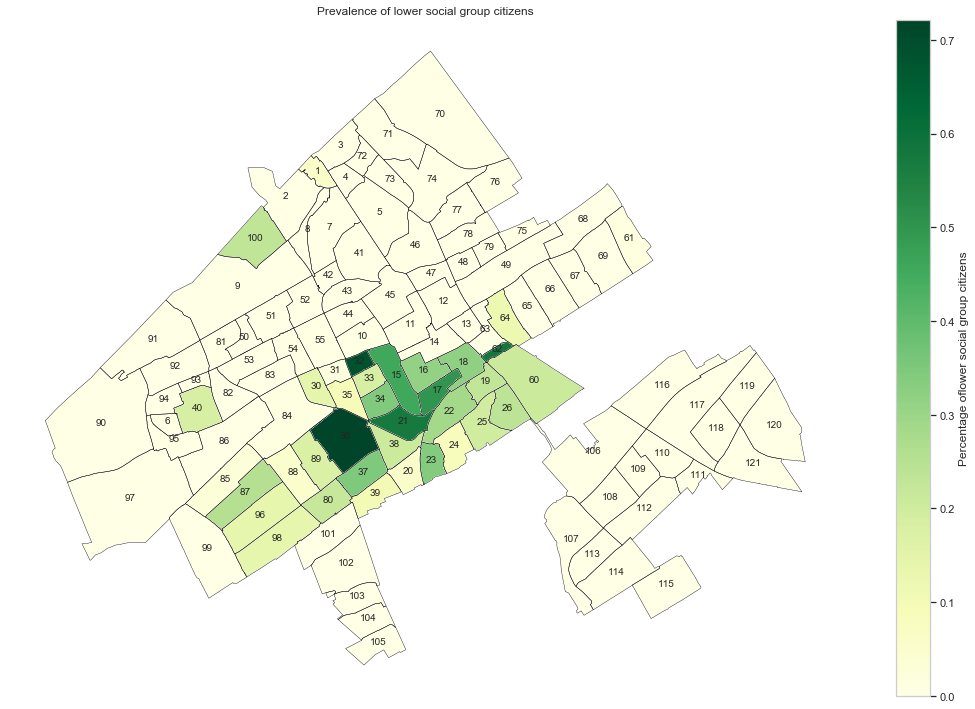

In [183]:
fig = plt.figure(1, figsize=(15,10)) 
ax = fig.add_subplot()
string = "lower social group"
buurten.apply(lambda x: ax.annotate(s=x.BUURTCODE, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1);

buurten.boundary.plot(ax=ax, color='Black', linewidth=.4)

buurten.plot(ax=ax, cmap='YlGn', column='KPI-p-sc-lower', figsize=(12, 12),legend=True,
             legend_kwds={'label': "Percentage of" + string + " citizens"}).axis('off')
plt.title("Prevalence of " + string + " citizens")
fig.tight_layout()